# MNIST Classification using Tensorflow

Training a Deep Learning model on handwritten digits using Tensorflow and Keras to accurately predict the test set

Kaggle link to the challenge - https://www.kaggle.com/c/digit-recognizer

## Contents

## 0: Importing libraries and the dataset

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the data
train = pd.read_csv("../input/digit-recognizer/train.csv")
test = pd.read_csv("../input/digit-recognizer/test.csv")

In [3]:
# Seperating features and label
y_train = train["label"]
X_train = train.drop(["label"], axis=1)

## 1: Exploratory Data Analysis

Performing EDA on the training dataset

In [4]:
# Size of the training data
X_train.shape

(42000, 784)

In [5]:
X_train.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


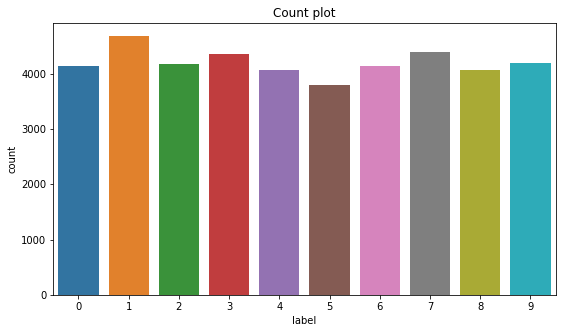

In [6]:
# Visualize the number of digits under each class
plt.figure(figsize=(9, 5))
sns.countplot(y_train)
plt.title("Count plot");

In [7]:
y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

There seem to be an equal distribution of class labels

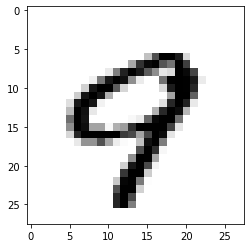

In [8]:
# Displaying some training samples
img_matrix = X_train.iloc[100].to_numpy()
img_matrix = img_matrix.reshape(28, 28)

plt.imshow(img_matrix, cmap=plt.cm.binary)

## 3: Feature Engineering

Feature engineering is an essential step of data preprocessin, this helps the model converge much faster.
We will be performing 3 main steps here
1. Normalization - We will perform grey scale normalization to reduce the illumination difference it also helps the model train faster
2. Reshape - We will drop the shape to 28x28. We will be adding an extra dimension, i.e 28x28x1 (Greyscale data). We have to add this extra dimension for keras, as 
3. Label Encoding - encoding labels to one hot vectors

In [9]:
# Normalization
X_train = tf.keras.utils.normalize(X_train, axis=1)
test = tf.keras.utils.normalize(test, axis=1)

In [10]:
# Reshape
X_train = X_train.values.reshape(-1, 28, 28)
test = test.values.reshape(-1, 28, 28)

## 4: Train Test Split

Splitting `X_train` into training data (90%) and test data (10%) using `sklearn.model_selection.train_test_split`

In [11]:
X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [12]:
X_train.shape, X_eval.shape, y_train.shape, y_eval.shape

((37800, 28, 28), (4200, 28, 28), (37800,), (4200,))

## 5: Creating, Training and Fitting the model

In [13]:
# 1: Building the model
model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(10, activation=tf.nn.sigmoid))

# 2. Compile the model
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

# 3. Train the model
history = model.fit(X_train, y_train,
         validation_data=(X_eval, y_eval),
         epochs=100)

Epoch 1/100
1182/1182 [==============================] - 4s 2ms/step - loss: 0.7730 - accuracy: 0.7876 - val_loss: 0.2402 - val_accuracy: 0.9283
Epoch 2/100
1182/1182 [==============================] - 2s 2ms/step - loss: 0.1972 - accuracy: 0.9416 - val_loss: 0.1821 - val_accuracy: 0.9426
Epoch 3/100
1182/1182 [==============================] - 2s 2ms/step - loss: 0.1417 - accuracy: 0.9576 - val_loss: 0.1412 - val_accuracy: 0.9569
Epoch 4/100
1182/1182 [==============================] - 3s 2ms/step - loss: 0.1095 - accuracy: 0.9666 - val_loss: 0.1232 - val_accuracy: 0.9614
Epoch 5/100
1182/1182 [==============================] - 2s 2ms/step - loss: 0.0862 - accuracy: 0.9727 - val_loss: 0.1128 - val_accuracy: 0.9655
Epoch 6/100
1182/1182 [==============================] - 2s 2ms/step - loss: 0.0697 - accuracy: 0.9793 - val_loss: 0.1012 - val_accuracy: 0.9695
Epoch 7/100
1182/1182 [==============================] - 2s 2ms/step - loss: 0.0559 - accuracy: 0.9831 - val_loss: 0.1046 - val_ac

## 6: Visualize Train and Validation Results

<AxesSubplot:>

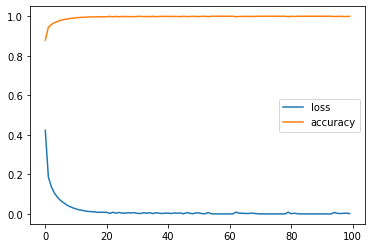

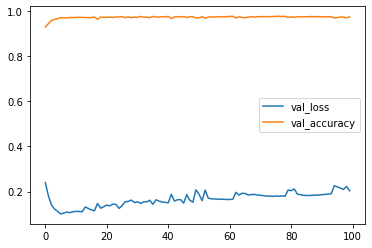

In [14]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ["loss", "accuracy"]].plot()
history_df.loc[:, ["val_loss", "val_accuracy"]].plot()

In [15]:
# Summary of the scores
history_df.describe()

,loss,accuracy,val_loss,val_accuracy
count,100.000000,100.000000,100.000000,100.000000
mean,0.015214,0.995401,0.165912,0.970936
std,0.049480,0.014418,0.030567,0.006002
min,0.000063,0.879206,0.101213,0.928333
25%,0.000137,0.997712,0.147620,0.970000
50%,0.003560,0.999021,0.166121,0.972381
75%,0.007490,0.999974,0.186210,0.973571
max,0.422981,0.999974,0.240215,0.975714


Since the validation accuracy is over ~ 97.9, the same model will be used to submit the result.

## 7. Submit Results

In [16]:
results = model.predict(test)
results = np.argmax(results, axis=1)

submission = pd.DataFrame({"ImageId": [i for i in range(1, 28001)] , "Label": list(results)})

submission.to_csv("mnist_submission.csv", index=False)

# 8. Random Validation

A random sample of the test set is taken to validate with the predictions made by the model

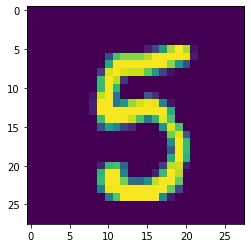

In [17]:
plt.imshow(test[10].reshape(28, 28))

In [18]:
submission.iloc[10]

ImageId    11
Label       5
Name: 10, dtype: int64